In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import layers
import   matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose,Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import backend as K
# from google.colab import drive
# from google.colab import files

forming numpy array out of data set given



*  reading validation
data and its labels

*  reading train data and its labels

*   reading test data and its labels




In [ ]:
files.upload()

TypeError: ignored

In [ ]:
# drive.mount('/content/drive')
#os.chdir('drive/My Drive/projects/intern ml nitk/UNET--Nuclei-Segmentation-for-Histopathology-images/train_dataset/')
os.getcwd()
%cd "projects/diluted conv for histopathology/train_dataset"

[Errno 2] No such file or directory: 'projects/diluted conv for histopathology/train_dataset'
/home/work


In [ ]:
train_data=np.load('train_img.npy')
train_label=np.load('train_mask.npy')

In [ ]:
data_train=[]

data_train_label=[]

data_test=[]
data_test_label=[]
data_val=[]
data_val_label=[]
def reading_data():
  for f in os.listdir("train"):                         #loading training data
    a=cv2.imread(os.getcwd()+'/train/'+f,0)
    a=cv2.resize(a,(256,256),interpolation = cv2.INTER_AREA)
    a=np.expand_dims(a,axis=2)
    #a=cv2.resize(a,(572,572),interpolation = cv2.INTER_AREA)
    data_train.append(a)
  print('done train')
  for f in os.listdir("train_labels"):                #loading training_labels data
    a=cv2.imread(os.getcwd()+'/train_labels/'+f,0)
    a=a/255
    a=cv2.resize(a,(256,256),interpolation = cv2.INTER_AREA)
    a=np.expand_dims(a,axis=2)
    #a=cv2.resize(a,(388,388),interpolation = cv2.INTER_AREA)
    data_train_label.append(a)
  print('done train')
  for f in os.listdir("test"):                         #loading test data
    a=cv2.imread(os.getcwd()+'/test/'+f,1)
    a=cv2.resize(a,(256,256),interpolation = cv2.INTER_AREA)
#     a=np.expand_dims(a,axis=2)

    data_test.append(a)
  print('done train')
  for f in os.listdir("test_gt"):                         #loading test labels data
    a=cv2.imread(os.getcwd()+'/test_gt/'+f,0)
    a=a/255
    a=cv2.resize(a,(256,256),interpolation = cv2.INTER_AREA)
    a=np.expand_dims(a,axis=2)

    data_test_label.append(a)
  print('done train')
  for f in os.listdir("val"):                         #loading training dataa
    a=cv2.imread(os.getcwd()+'/val/'+f,0)
    a=np.expand_dims(a,axis=2)
   # a=cv2.resize(a,(572,572),interpolation = cv2.INTER_AREA)
    data_val.append(a)
  print('done train')
  for f in os.listdir("val_labels"):                         #loading training dataa
    a=cv2.imread(os.getcwd()+'/val_labels/'+f,0)
    a=a/255
    a=np.expand_dims(a,axis=2)
  # a=cv2.resize(a,(388,388),interpolation = cv2.INTER_AREA)
    data_val_label.append(a)
reading_data()
data_train=np.asarray(data_train)
data_train_label=np.asarray(data_train_label)
data_test=np.asarray(data_test)
data_test_label=np.asarray(data_test_label)
data_val=np.asarray(data_val)
data_val_label=np.asarray(data_val_label)
#data_train_label=data_train_label[:110,:,:,:]
# plt.imshow(data_test[30])
# plt.show()
# plt.imshow(data_test_label[30])
# plt.show()
# plt.imshow(data_train[61])
# plt.show()
# plt.imshow(data_train_label[61])
# plt.show()
# plt.imshow(data_val[0])
# plt.show()
# plt.imshow(data_val_label[0])
# plt.show()
print(np.shape(data_train))
print(np.shape(data_train_label))
print(np.shape(data_test))
print(np.shape(data_test_label))
print(np.shape(data_val))
print(np.shape(data_val_label))
data=np.zeros((512,512))
print(np.shape(data_train[0]))
# for i in range(512):
#   for j in range(512):
#     if data_test_label[0,i,j]==0:
#       data[i,j]=False
#     else:
#       data[i,j]=True
# plt.imshow(data)
# plt.show()



done train
done train
done train
done train
done train
(110, 256, 256, 1)
(110, 256, 256, 1)
(50, 256, 256, 3)
(50, 256, 256, 1)
(10, 512, 512, 1)
(10, 512, 512, 1)
(256, 256, 1)


formation of numpy array is done



model


In [ ]:
def get_unet(IMG_WIDTH=256,IMG_HEIGHT=256,IMG_CHANNELS=3):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255) (inputs)
    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)
    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(32, (
        3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [ ]:
unet_model=get_unet()


In [ ]:
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=8,
                         write_images=True)

C:\Users\killerlock\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [ ]:

h=unet_model.fit(train_data,train_label,batch_size=8,epochs=50,validation_split=0.2)

Train on 536 samples, validate on 134 samples
Epoch 1/50
536/536 [==============================] - 9s 17ms/step - loss: 0.3327 - acc: 0.8661 - val_loss: 0.1945 - val_acc: 0.9198
Epoch 2/50
536/536 [==============================] - 7s 13ms/step - loss: 0.1650 - acc: 0.9365 - val_loss: 0.1258 - val_acc: 0.9516
Epoch 3/50
536/536 [==============================] - 7s 13ms/step - loss: 0.1300 - acc: 0.9499 - val_loss: 0.1090 - val_acc: 0.9592
Epoch 4/50
536/536 [==============================] - 7s 13ms/step - loss: 0.1101 - acc: 0.9589 - val_loss: 0.1038 - val_acc: 0.9611
Epoch 5/50
536/536 [==============================] - 7s 13ms/step - loss: 0.0982 - acc: 0.9635 - val_loss: 0.0891 - val_acc: 0.9648
Epoch 6/50
536/536 [==============================] - 7s 13ms/step - loss: 0.0969 - acc: 0.9637 - val_loss: 0.0787 - val_acc: 0.9699
Epoch 7/50
536/536 [==============================] - 7s 13ms/step - loss: 0.0987 - acc: 0.9630 - val_loss: 0.0937 - val_acc: 0.9636
Epoch 8/50
536/536 [===

In [ ]:
print(unet_model.history)

In [ ]:
loss=unet_model.evaluate(data_test,data_test_label,batch_size=8)

50/50 [==============================] - 1s 16ms/step


In [ ]:
print(loss)

[0.5507927417755127, 0.8554916381835938]


In [ ]:
unet_model.save()

canny edge detecction

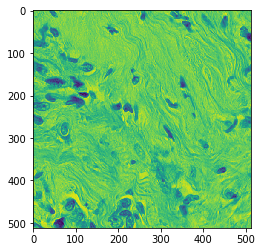

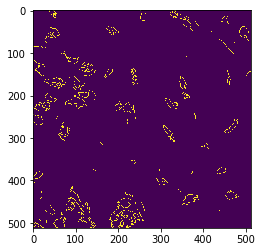

In [ ]:
img=np.reshape(data_test[0],(512,512))
e=cv2.Canny(img,100,250)
plt.imshow(img)
plt.show()
plt.imshow(e)
plt.show()



In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
!pip install pandas